#### 1. Загрузка датасета из репозитория

Лабораторная работа 1. Линейная регрессия и факторный анализ 
-

**Цель:** изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качество

**Датасет:** [Happiness Index 2018-2019](https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019)

**Описание** В этом исследовании анализируется связь между показателем Индекса счастья в 2019 году и набором независимых переменных, таких как "Общий рейтинг", "ВВП на душу населения", "Социальная поддержка", "Ожидаемая продолжительность здоровой жизни", "Свобода выбора в жизни", "Щедрость" и "Восприятие коррупция". Целью данного исследования является изучение влияния этих независимых переменных на уровень счастья людей в течение года.

| Переменные    | Описание    |
|---|---|
| Overall rank    | Список рейтингов разных стран от 1 до 156 ((***ИСКЛЮЧАЕМ ТК ПО СУТИ ТОЖЕ САМОЕ ЧТО И SCORE***))  |
| Country or region    |  Список названий разных стран. (***ИСКЛЮЧАЕМ***) |
| Score    | Список показателей счастья в разных странах  (***ЗАВИСИМАЯ ПЕРЕМЕННАЯ***)   |
| GDP per capita    | Показатель ВВП на душу населения в разных странах.    |
| Social support    | Социальная поддержка в разных странах.    |
| Healthy life expectancy    | Ожидаемая продолжительность здоровой жизни в разных странах.   |
| Freedom to make life choices    | Оценка восприятия свободы в разных странах.    |
| Generosity    | оценка щедрости (качества быть добрым и великодушным) в разных странах.    |
| Perceptions of corruption    | Оценка восприятия коррупции в разных странах.    |

In [25]:
import pandas as pandas

dataset = pandas.read_csv('2019.csv')
dataset = dataset.drop(columns=['Overall rank', 'Country or region'])
print(dataset)

     Score  GDP per capita  Social support  Healthy life expectancy  \
0    7.769           1.340           1.587                    0.986   
1    7.600           1.383           1.573                    0.996   
2    7.554           1.488           1.582                    1.028   
3    7.494           1.380           1.624                    1.026   
4    7.488           1.396           1.522                    0.999   
..     ...             ...             ...                      ...   
151  3.334           0.359           0.711                    0.614   
152  3.231           0.476           0.885                    0.499   
153  3.203           0.350           0.517                    0.361   
154  3.083           0.026           0.000                    0.105   
155  2.853           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596       0.153                      0.393

#### 2.Подготовка данных: первичный анализ, визуализация распределения признаков и целевой переменной

In [26]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         156 non-null    float64
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
 5   Generosity                    156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB
None


Вывели данные, можно увидеть типы данных переменных и отсутвие нулевых(NaN) значений

In [27]:
print(dataset.describe())

            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254                   

Score
-----------------------
Эксцесс: -0.627
Асимметрия: 0.011
Колмогорова-Смирнова p-value: 0.6389817597934611
Колмогорова-Смирнова статистика: 0.058
Колмогорова-Смирнова нормальность: True
p_value: 0.05
-----------------------
GDP per capita
-----------------------
Эксцесс: -0.784
Асимметрия: -0.382
Колмогорова-Смирнова p-value: 0.27777164168670687
Колмогорова-Смирнова статистика: 0.078
Колмогорова-Смирнова нормальность: True
p_value: 0.05
-----------------------
Social support
-----------------------
Эксцесс: 1.152
Асимметрия: -1.124
Колмогорова-Смирнова p-value: 0.06635296449896844
Колмогорова-Смирнова статистика: 0.103
Колмогорова-Смирнова нормальность: True
p_value: 0.05
-----------------------
Healthy life expectancy
-----------------------
Эксцесс: -0.331
Асимметрия: -0.608
Колмогорова-Смирнова p-value: 0.015812848138336114
Колмогорова-Смирнова статистика: 0.123
Колмогорова-Смирнова нормальность: False
p_value: 0.05
-----------------------
Freedom to make life choices
--------

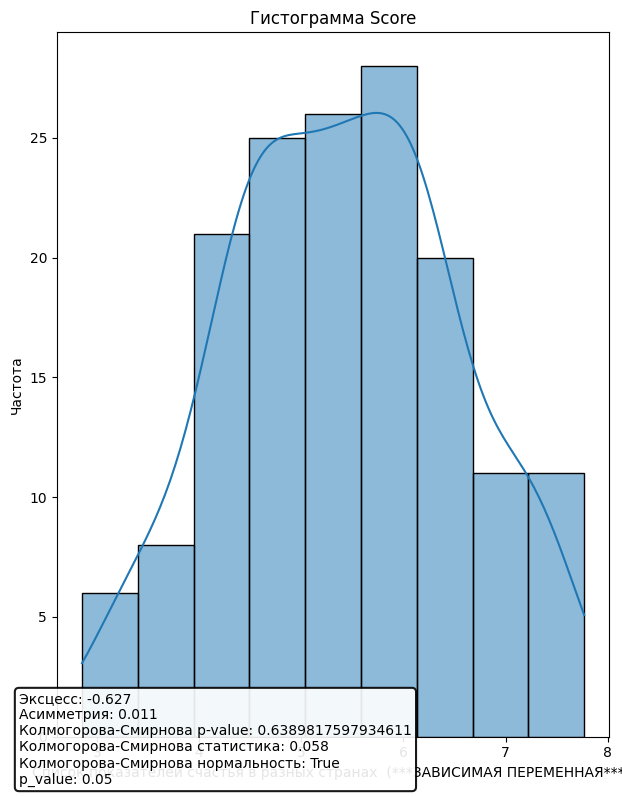

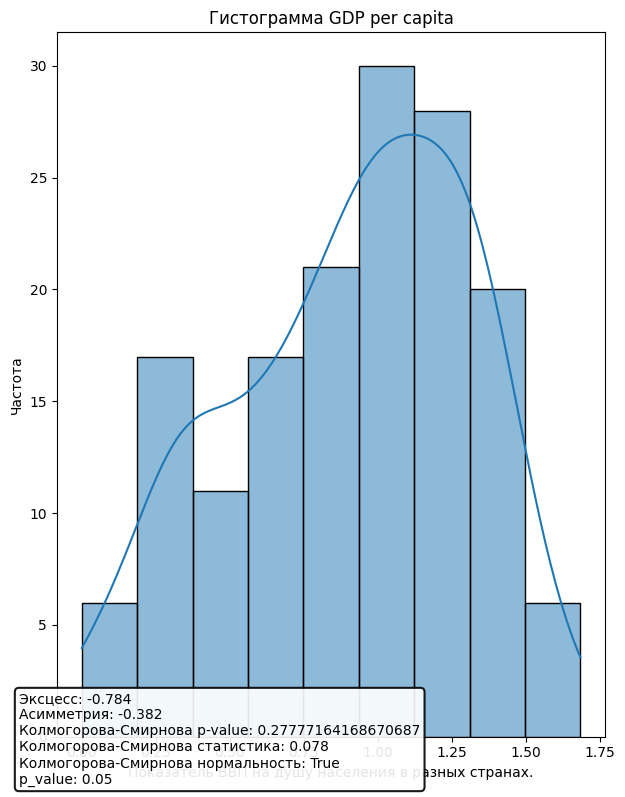

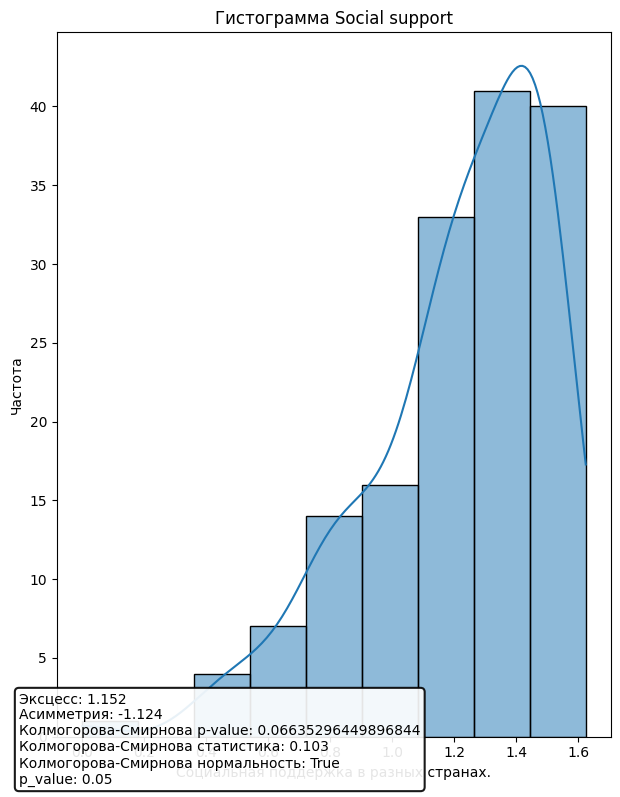

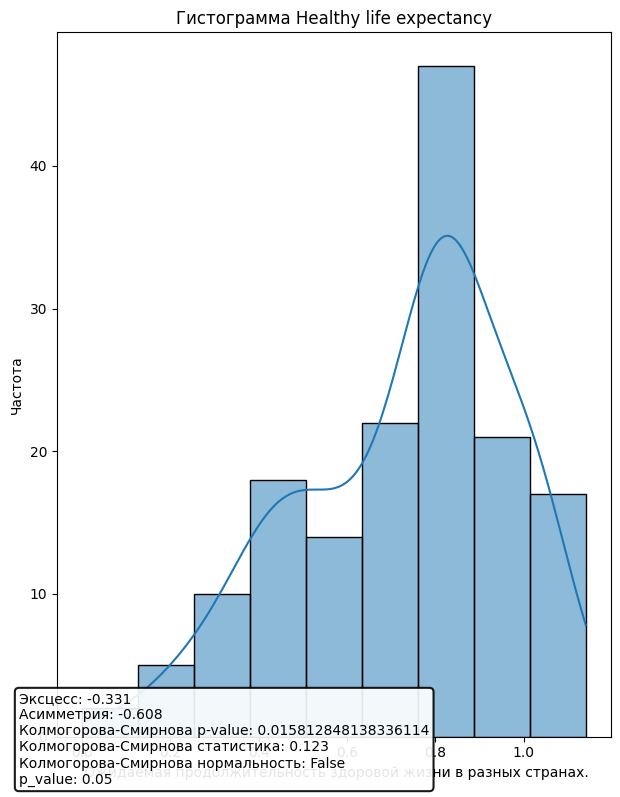

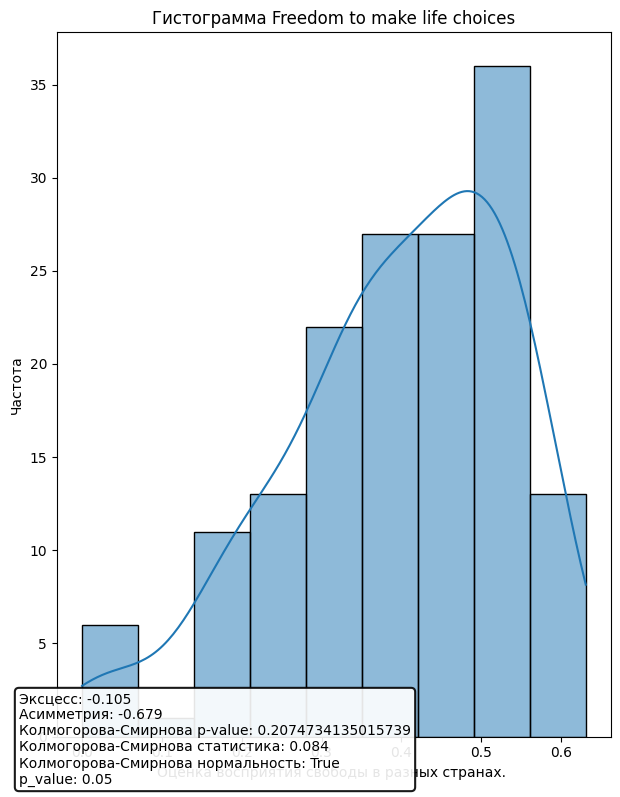

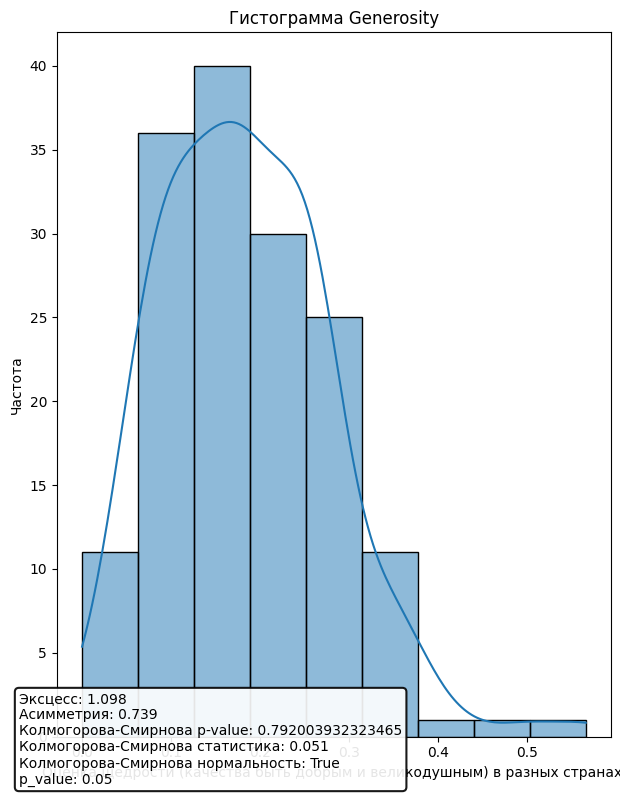

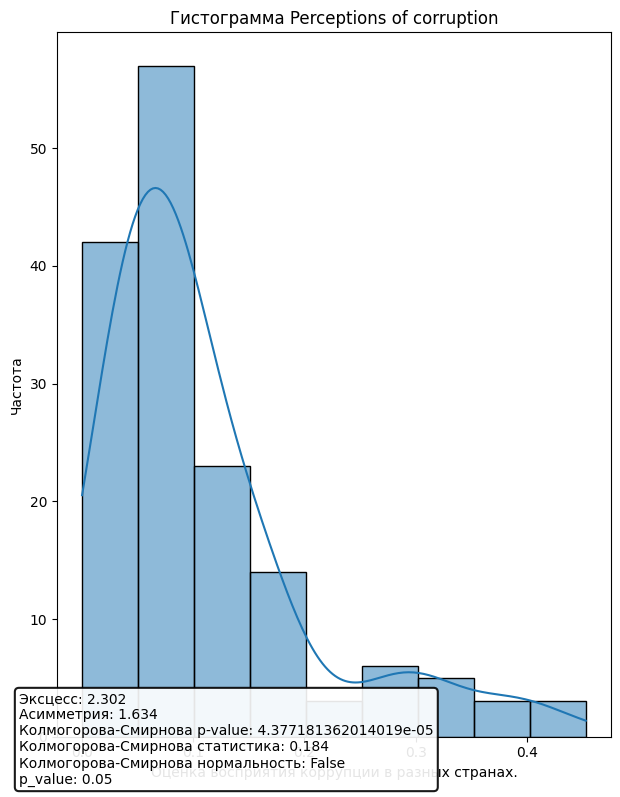

In [ ]:
import matplotlib.pyplot as plot
import seaborn
from scipy.stats import norm, skew, kurtosis, kstest
import numpy

ALPHA = 0.05

descriptions = {
    'Score': 'Список показателей счастья в разных странах  (***ЗАВИСИМАЯ ПЕРЕМЕННАЯ***) ',
    'GDP per capita': 'Показатель ВВП на душу населения в разных странах.',
    'Social support': 'Социальная поддержка в разных странах.',
    'Healthy life expectancy': ' Ожидаемая продолжительность здоровой жизни в разных странах.',
    'Freedom to make life choices': 'Оценка восприятия свободы в разных странах. ',
    'Generosity': 'Оценка щедрости (качества быть добрым и великодушным) в разных странах.',
    'Perceptions of corruption': 'Оценка восприятия коррупции в разных странах.',

}

for _,column in enumerate(dataset.columns):
    plot.figure(figsize=(12, 8))
    plot.subplot(1, 2, 1)
    seaborn.histplot(dataset[column], kde=True, bins='sturges')
    kstestObject = kstest(dataset[column], 'norm', args=(numpy.mean(dataset[column]), numpy.std(dataset[column])))

    #seaborn.histplot(dataset[column], kde=True, bins='sturges', stat='density')
    
    #mu, std = dataset[column].mean(), dataset[column].std()
    #x = numpy.linspace(dataset[column].min(), dataset[column].max(), 100)
    #p = norm.pandasf(x, mu, std)
    #plot.plot(x, p, 'r-', linewidth=2, label='Нормальное распределение')
    #seaborn.distplot(dataset[column], fit=norm)
    legendText = (f'Эксцесс: {kurtosis(dataset[column]):.3f}\n'
              f'Асимметрия: {skew(dataset[column]):.3f}\n'
              f'Колмогорова-Смирнова p-value: {kstestObject.pvalue}\n'
              f'Колмогорова-Смирнова статистика: {kstestObject.statistic:.3f}\n'
              f'Колмогорова-Смирнова нормальность: {kstestObject.pvalue >= ALPHA}\n'
              f'p_value: {ALPHA}')
    plot.figtext(0.02, 0.01, legendText, 
            ha='left',
            va='bottom',
            fontsize=10,
            bbox=dict(boxstyle='round', 
                      facecolor='white', 
                      edgecolor='black',
                      linewidth=1.5,
                      alpha=0.9))
    plot.subplots_adjust(bottom=0.5)
    print(column)
    print('-----------------------')
    print(legendText)
    print('-----------------------')

    plot.title(f'Гистограмма {column}')
    plot.xlabel(descriptions[column])
    plot.ylabel('Частота') 
    plot.tight_layout()

Анализ распределений:

- 1. score
  - Эксцесс: -0.627 - плосковершинное распределение
  - Ассиметрия: 0.011 - слабая правостороняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05

- 2. GDP per capita
  - Эксцесс:  -0.784 - плосковершинное распределение
  - Ассиметрия:  -0.382 - умеренная левосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 3. Social support
  - Эксцесс: 1.152 - островершинное распределение
  - Ассиметрия: -1.124 - умеренная левосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 4. Healthy life expectancy
  - Эксцесс: -0.331 - плосковершинное распределение
  - Ассиметрия:  -0.608 - левосторянняя ассиметрия
  - Колмогоров-Смирнов: не является нормальным распределением, тк p value < 0.05


- 5. Freedom to make life choices
  - Эксцесс: -0.105 - плосковершинное распределение
  - Ассиметрия:  -0.679 - левосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 6. Generosity
  - Эксцесс: 1.098 - островершинное распределение
  - Ассиметрия: 0.739 - правосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 7. Perceptions of corruption
  - Эксцесс: 2.302 - островершинное распределение
  - Ассиметрия:  1.634 - правосторянняя ассиметрия
  - Колмогоров-Смирнов: не является нормальным распределением, тк p value < 0.05


#### 3. Проводим предобработку данных: удаляем пропущенные значения, закодируем категориальные переменные (опционально), нормализуем признаки.

In [29]:
dataset_new = dataset.replace('?', pandas.NA).dropna()

print(f"Исходный размер: {dataset.shape}")
print(f"Размер после удаления пропущенных значений: {dataset_new.shape}")

Исходный размер: (156, 7)
Размер после удаления пропущенных значений: (156, 7)


Можно повторить вывод выше что в данном датасете отсутсвуют NaN значения

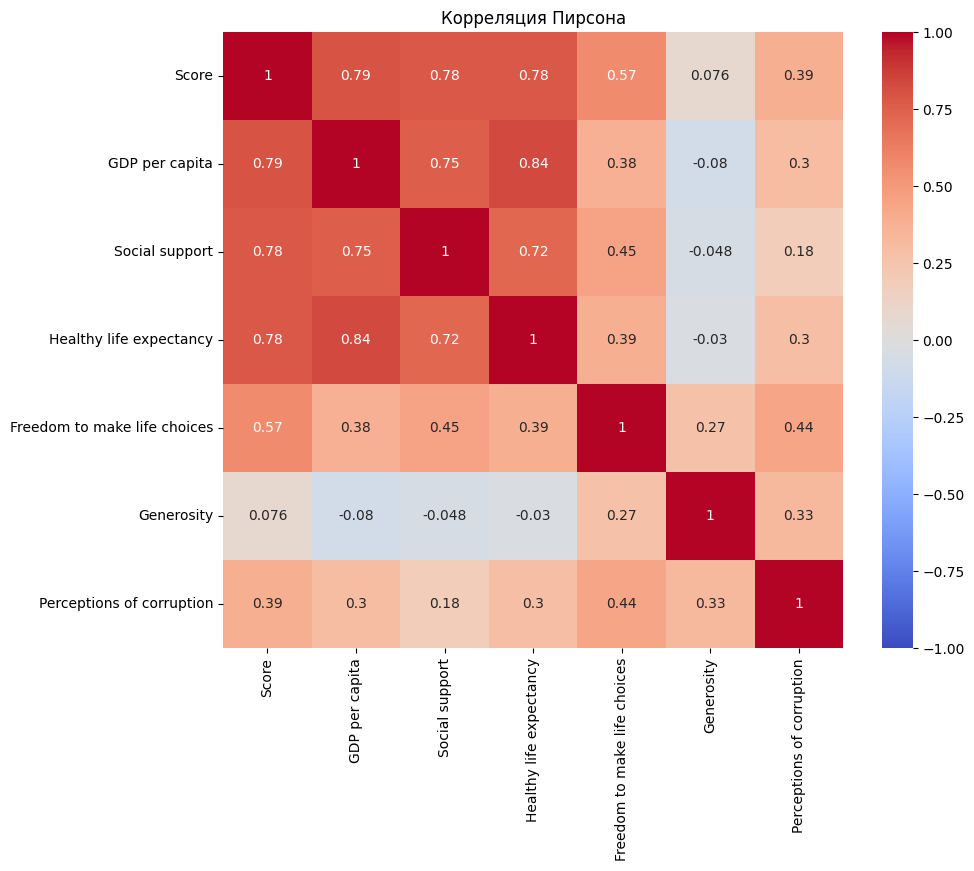


Корреляция с целевой переменной (Score):
GDP per capita: 0.794
Healthy life expectancy: 0.780
Social support: 0.777
Freedom to make life choices: 0.567
Perceptions of corruption: 0.386
Generosity: 0.076


In [30]:
pearson_corr = dataset[dataset.columns.tolist()].corr(method='pearson')

plot.figure(figsize=(10, 8))
seaborn.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plot.title('Корреляция Пирсона')
plot.show()

print("\nКорреляция с целевой переменной (Score):")
income_corr = pearson_corr['Score'].sort_values(key=abs, ascending=False)
for feature, corr_value in income_corr.items():
    if feature != 'Score':
        print(f"{feature}: {corr_value:.3f}")


Можно заметить, что есть независимые переменные которые сильно коррелируют между собой, а именно: 
1. GDP per capita и Social support (0.75)
2. GDP per capita и Healthy life expectancy (0.84)
3. Social support и Healthy life expectancy (0.84)

#### 4. Сделать выводы о наличии мультиколлинеарности (расчет VIF-коэффициента)

Нормализация Данных MinMax методом и расчет VIF-коэффициентов:

In [31]:
from sklearn.preprocessing import StandardScaler  
from statsmodels.stats.outliers_influence import variance_inflation_factor 

scaler = StandardScaler()
data_normalized = scaler.fit_transform(dataset)
data_normalized = pandas.DataFrame(
    data_normalized,
    columns=dataset.columns
)

VIFs = pandas.DataFrame()
VIFs['Variable'] = data_normalized.columns
VIFs['VIF'] = [variance_inflation_factor(data_normalized.values, i) for i in range(data_normalized.shape[1])]
print(VIFs)

print()

print('Высокая мультиколлинеарность (VIF > 10):')
for _,row in VIFs.iterrows():
    if row.VIF >= 10:
        print(f'{row.Variable}: {row.VIF}')

                       Variable       VIF
0                         Score  4.528243
1                GDP per capita  4.464561
2                Social support  3.149103
3       Healthy life expectancy  3.821771
4  Freedom to make life choices  1.733908
5                    Generosity  1.232056
6     Perceptions of corruption  1.462472

Высокая мультиколлинеарность (VIF > 10):


У нас нет переменных с VIF > 10 и > 5, но есть близкие значения к нему, это GDP per capita, Social support, Healthy life expectancy

#### 5. Построить регрессионные модели (линейная и гребневая). Если целевая переменная - категориальная, то исследовать логистическую регрессию. Разделить на тренировочную и тестовую выборки (80/20 или 70/30). Использовать кросс-валидацию. Оценить качество построенной модели с помощью метрик: RMSE (Root Mean Square Error), R² (коэффициент детерминации) и MAPE (Mean Absolute Percentage Error)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

X = dataset[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
Y = dataset['Score']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_regression = LinearRegression()

scores = cross_val_score(linear_regression, X_train_scaled, y_train, cv=5, scoring='r2')

print("-----Кросс валидация (Линейная регрессия)------")
print(f'R^2 для каждого из столбцов: {scores}')
print(f'R^2 для всех столбцов: {scores.mean()}')

linear_regression.fit(X_train_scaled, y_train)

y_test_predicted_linear = linear_regression.predict(X_test_scaled)

r2 = r2_score(y_test, y_test_predicted_linear)
mape = mean_absolute_percentage_error(y_test, y_test_predicted_linear)
rmse = numpy.sqrt(mean_squared_error(y_test, y_test_predicted_linear))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2:.3f}')
print(f'\tMAPE: {mape:.3f}')
print(f'\tRMSE: {rmse:.3f}')

print("\n-----Коэффициенты линейной регрессии------")
print(f'Intercept (свободный член): {linear_regression.intercept_:.4f}')

for i, coef in enumerate(linear_regression.coef_):
    print(f'Коэффициент для признака {i}: {coef:.4f}')



-----Кросс валидация (Линейная регрессия)------
R^2 для каждого из столбцов: [0.64144019 0.83652327 0.69726074 0.88724236 0.78149921]
R^2 для всех столбцов: 0.7687931536944046

Метрики на тестовой выборке:
	R²: 0.602
	MAPE: 0.104
	RMSE: 0.644

-----Коэффициенты линейной регрессии------
Intercept (свободный член): 5.3946
Коэффициент для признака 0: 0.3119
Коэффициент для признака 1: 0.3738
Коэффициент для признака 2: 0.2321
Коэффициент для признака 3: 0.2232
Коэффициент для признака 4: 0.0263
Коэффициент для признака 5: 0.1110


Анализ значений метрик линейной регрессионной модели:
- R²: 0.602 - модель объясняет 60.2% вариации Score (умеренная объяснительная способность модели)
- RMSE: 0.644 - средняя ошибка предсказания Score 0.644 балла
- MAPE: 0.104 - средняя относительная ошибка 10.4%, модель хороша в предсказаниях

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge


print("=== Гребневая регрессионная модель ===")
alphas = [0.1, 1.0, 10.0, 100.0]
model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Лучшая альфа:', model.alpha_)
print('MSE:', mean_squared_error(y_test, y_pred))

ridge_regression = Ridge(model.alpha_)
cv_scores_ridge = cross_val_score(ridge_regression, X_train_scaled, y_train, cv=5, scoring='r2')
print("=== Кросс-валидация ===")
print(f'R^2 для каждого из столбцов: {cv_scores_ridge}')
print(f'R^2 для всех столбцов: {cv_scores_ridge.mean()}')
ridge_regression.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_regression.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_ridge = numpy.sqrt(mean_squared_error(y_test, y_pred_ridge))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2_ridge:.3f}')
print(f'\tMAPE: {mape_ridge:.3f}')
print(f'\tRMSE: {rmse_ridge:.3f}')

print("\n-----Коэффициенты Гребневой регрессии------")
print(f'Intercept (свободный член): {ridge_regression.intercept_:.4f}')

for i, coef in enumerate(ridge_regression.coef_):
    print(f'Коэффициент для признака {i}: {coef:.4f}')


=== Гребневая регрессионная модель ===
Лучшая альфа: 1.0
MSE: 0.41357079905755273
=== Кросс-валидация ===
R^2 для каждого из столбцов: [0.64239388 0.83604839 0.70032439 0.88659104 0.78159805]
R^2 для всех столбцов: 0.7693911513082016

Метрики на тестовой выборке:
	R²: 0.602
	MAPE: 0.104
	RMSE: 0.644

-----Коэффициенты Гребневой регрессии------
Intercept (свободный член): 5.3946
Коэффициент для признака 0: 0.3103
Коэффициент для признака 1: 0.3712
Коэффициент для признака 2: 0.2335
Коэффициент для признака 3: 0.2229
Коэффициент для признака 4: 0.0259
Коэффициент для признака 5: 0.1110


Гребневая регрессия показала такие же значения как и линейная

#### 6. Устранить мультиколлинеарность и снизить размерность признаков с помощью метода главных компонент (PCA).

Для сохранения 95% дисперсии необходимо 5 компонент
Исходная размерность данных: 7
Новая размерность данных: 5
Объяснённая дисперсия: 0.9530


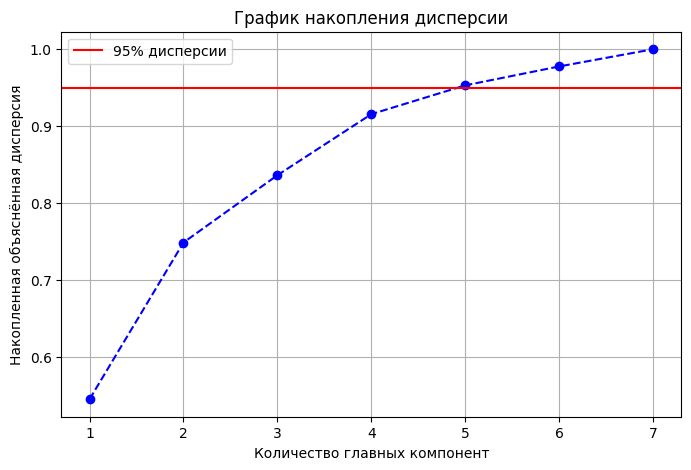

Кумулятивная дисперсия:
Компонент 1: 54.46491659387208%
Компонент 2: 74.85261871223166%
Компонент 3: 83.60812259075627%
Компонент 4: 91.55536944174555%
Компонент 5: 95.29969682445399%
Компонент 6: 97.76121284949312%
Компонент 7: 100.0%


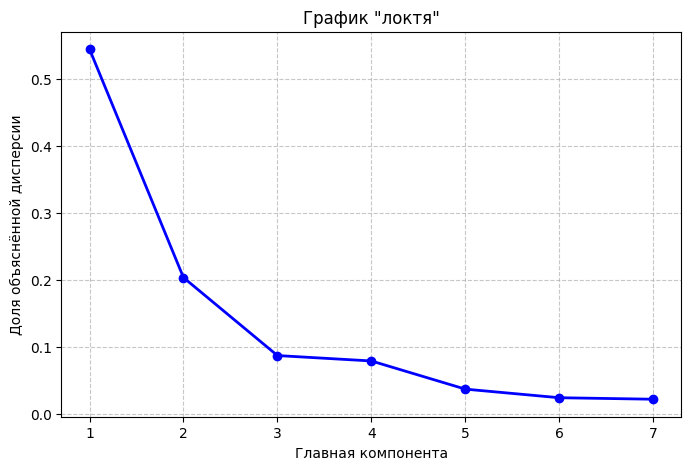

Доля объясненной дисперсии:
Компонент 1: 54.46491659387208%
Компонент 2: 20.387702118359584%
Компонент 3: 8.755503878524602%
Компонент 4: 7.947246850989289%
Компонент 5: 3.7443273827084185%
Компонент 6: 2.4615160250391352%
Компонент 7: 2.238787150506891%


In [ ]:
from sklearn.decomposition import PCA
pca_start = PCA()
X_pca = pca_start.fit_transform(data_normalized)

explained_variance_ratio = pca_start.explained_variance_ratio_
cumulative_variance_ratio = numpy.cumsum(explained_variance_ratio)


n_components = numpy.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Для сохранения 95% дисперсии необходимо {n_components} компонент")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(data_normalized)
X_test_pca = pca.transform(X_test_scaled)

print(f"Исходная размерность данных: {data_normalized.shape[1]}")
print(f"Новая размерность данных: {X_reduced.shape[1]}")
print(f"Объяснённая дисперсия: {pca.explained_variance_ratio_.sum():.4f}")

plot.figure(figsize=(8, 5))
plot.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plot.axhline(y=0.95, color='r', linestyle='-', label='95% дисперсии')
plot.xlabel('Количество главных компонент')
plot.ylabel('Накопленная объяснённая дисперсия')
plot.title('График накопления дисперсии')
plot.legend()
plot.grid(True)
plot.xticks(range(1, len(cumulative_variance_ratio) + 1))
plot.show()
print('Кумулятивная дисперсия:')
for i, value in enumerate(cumulative_variance_ratio):
    print(f'Компонент {i+1}: {value*100}%')

plot.figure(figsize=(8, 5))
plot.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    'bo-',
    linewidth=2,
    markersize=6
)
plot.xlabel('Главная компонента')
plot.ylabel('Доля объяснённой дисперсии')
plot.title('График "локтя"')
plot.grid(True, linestyle='--', alpha=0.7)
plot.xticks(range(1, len(explained_variance_ratio) + 1))
plot.show()
print('Доля объясненной дисперсии:')
for i, value in enumerate(explained_variance_ratio):
    print(f'Компонент {i+1}: {value*100}%')


***Вывод:***
- Изначально было 7 признаков влияющих на значение Score, были сжаты до 5, которые объясняют 95.3% всей информации, остальные 2 - 4,7. Это означает, что PCA позволил существенно снизить размерность при минимальной потере информации.
- По графику локтя можно увидеть, что 6 и 7 признаки находятся практически на одном уровне (2.3%), что практически не дает рост объясненной дисперсии, также эти признаки имеют накопленную дисперсию > 95%, что говорит о том, что дальнейшее увеличение числа компонент нецелесообразно, так как не приводит к значимому приросту информативности модели.
- Это означает, что можно уменьшить размерность с 7 до 5 признаков, сохранив практически всю информацию
- Была устранена мультиколлинеарность

#### 7. Повторить шаг 5 (линейная и гребневая регрессия), но использовать в качестве признаков не исходные данные, а главные компоненты. Сравнить метрики качества (RMSE, R² и MAPE) моделей, обученных на исходных данных и на главных компонентах.

In [93]:
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(data_normalized)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_regression_pca = LinearRegression()

scores = cross_val_score(linear_regression_pca, X_train_scaled, y_train, cv=5, scoring='r2')

print("-----Кросс валидация (Линейная регрессия (PCA))------")
print(f'R^2 для каждого из столбцов: {scores}')
print(f'R^2 для всех столбцов: {scores.mean()}')

linear_regression_pca.fit(X_train_scaled, y_train)

y_test_predicted_linear = linear_regression_pca.predict(X_test_scaled)

r2 = r2_score(y_test, y_test_predicted_linear)
mape = mean_absolute_percentage_error(y_test, y_test_predicted_linear)
rmse = numpy.sqrt(mean_squared_error(y_test, y_test_predicted_linear))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2:.3f}')
print(f'\tMAPE: {mape:.3f}')
print(f'\tRMSE: {rmse:.3f}')

print("\n-----Коэффициенты линейной регрессии------")
print(f'Intercept (свободный член): {linear_regression_pca.intercept_:.4f}')

for i, coef in enumerate(linear_regression_pca.coef_):
    print(f'Коэффициент для признака {i}: {coef:.4f}')



-----Кросс валидация (Линейная регрессия (PCA))------
R^2 для каждого из столбцов: [0.78553158 0.91062984 0.81108433 0.93921518 0.87184706]
R^2 для всех столбцов: 0.8636615971380308

Метрики на тестовой выборке:
	R²: 0.765
	MAPE: 0.079
	RMSE: 0.495

-----Коэффициенты линейной регрессии------
Intercept (свободный член): 5.3946
Коэффициент для признака 0: 1.0678
Коэффициент для признака 1: -0.0443
Коэффициент для признака 2: -0.0553
Коэффициент для признака 3: 0.0173
Коэффициент для признака 4: 0.0623


In [94]:
print("=== Гребневая регрессионная модель (PCA) ===")
alphas = [0.1, 1.0, 10.0, 100.0]
model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Лучшая альфа:', model.alpha_)
print('MSE:', mean_squared_error(y_test, y_pred))

ridge_regression_pca = Ridge(model.alpha_)
cv_scores_ridge = cross_val_score(ridge_regression_pca, X_train_scaled, y_train, cv=5, scoring='r2')
print("=== Кросс-валидация ===")
print(f'R^2 для каждого из столбцов: {cv_scores_ridge}')
print(f'R^2 для всех столбцов: {cv_scores_ridge.mean()}')
ridge_regression_pca.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_regression_pca.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_ridge = numpy.sqrt(mean_squared_error(y_test, y_pred_ridge))

print('\nМетрики на тестовой выборке:')
print(f'\tR²: {r2_ridge:.3f}')
print(f'\tMAPE: {mape_ridge:.3f}')
print(f'\tRMSE: {rmse_ridge:.3f}')

print("\n-----Коэффициенты Гребневой регрессии------")
print(f'Intercept (свободный член): {ridge_regression_pca.intercept_:.4f}')

for i, coef in enumerate(ridge_regression_pca.coef_):
    print(f'Коэффициент для признака {i}: {coef:.4f}')

=== Гребневая регрессионная модель (PCA) ===
Лучшая альфа: 10.0
MSE: 0.24624159083192773
=== Кросс-валидация ===
R^2 для каждого из столбцов: [0.79610295 0.89389594 0.83113882 0.91834815 0.85566139]
R^2 для всех столбцов: 0.8590294508168386

Метрики на тестовой выборке:
	R²: 0.752
	MAPE: 0.082
	RMSE: 0.508

-----Коэффициенты Гребневой регрессии------
Intercept (свободный член): 5.3946
Коэффициент для признака 0: 0.9874
Коэффициент для признака 1: -0.0381
Коэффициент для признака 2: -0.0474
Коэффициент для признака 3: 0.0194
Коэффициент для признака 4: 0.0563


# Сравнение моделей регрессии

## Линейная регрессия

| Метрика | Обычная LR | LR с PCA |
|---------|------------|----------|
| **R² (тест)** | 0.602 | 0.765 |
| **R² (кросс-валидация)** | 0.769 | 0.864 |
| **MAPE** | 0.104 | 0.079 |
| **RMSE** | 0.644 | 0.495 |
| **Количество признаков** | 7 | 5 |

## Гребневая регрессия

| Метрика | Обычная Ridge | Ridge с PCA |
|---------|---------------|-------------|
| **R² (тест)** | 0.602 | 0.752 |
| **R² (кросс-валидация)** | 0.769 | 0.859 |
| **MAPE** | 0.104 | 0.082 |
| **RMSE** | 0.644 | 0.508 |
| **Лучшая альфа** | 1.0 | 10.0 |


**Выводы:**
PCA значительно улучшает качество моделей:
   - R² увеличился на ~25% на тестовой выборке
   - Ошибки (MAPE и RMSE) снизились на ~20-25%
   - Кросс-валидация показывает более стабильные результаты

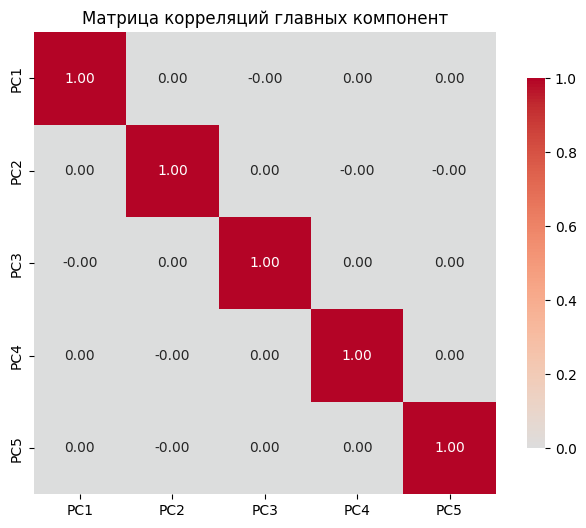

In [96]:
pca_columns = [f'PC{i+1}' for i in range(X_reduced.shape[1])]
df_pca = pandas.DataFrame(X_reduced, columns=pca_columns)

corr_matrix_pca = df_pca.corr()

plot.figure(figsize=(8, 6))
seaborn.heatmap(corr_matrix_pca, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            square=True,
            fmt=".2f",
            cbar_kws={"shrink": 0.8})
plot.title('Матрица корреляций главных компонент')
plot.show() 

Вывод:
- Мультиколлинеарность устранена


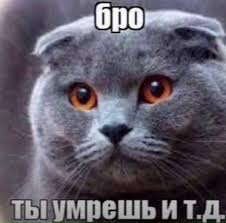